In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [164]:
url1="../Telemedicina/Telemedicina_sd_enc_python_.csv"
url2="../Telemedicina/sd.csv"

In [165]:
cualitativo=pd.read_csv(url1, encoding="latin-1", sep=";", header=0)
sd=pd.read_csv(url2, encoding="latin-1", sep=";", header=0)

# Data wrangling

In [166]:
df=pd.merge(sd, cualitativo,on="ID")

In [167]:
def new_column(row):
    if row['continuar.basal'] == "si" or row["continuar.seguimiento"] == "si":
        return 1
    else:
        return 0

In [173]:
df['continue_with_telemedicine'] = df.apply(new_column, axis=1)

In [174]:
df["continue_with_telemedicine"].value_counts()

1    1363
0     650
Name: continue_with_telemedicine, dtype: int64

In [175]:
df=df.reset_index()

In [176]:
df.columns

Index(['index', 'ID', 'Edad', 'Genero', 'Nivel educativo',
       'Lugar de residencia actual', 'Barrio o partido', 'Tipo de vivienda',
       'Acceso a WiFi en el hogar', 'Acceso a internet con datos del celular',
       '¿Qué uso podés hacer de la conexión a internet en tu hogar?',
       '¿Usás correo electrónico (e-mail)?',
       '¿Usás alguna red social (whats app, facebook, instagram, etc)?',
       '¿Acceso a computadora?', 'Acceso a tablet', 'Acceso a celular',
       '¿Qué plan tenés en tu celular?',
       '¿Compartís el celular con otra/s personas en tu hogar?', 'DNI',
       'Codigo', '¿Contestó basal?', '¿Contestó seguimiento?',
       'Asistencia_basal', 'Asistencia_seguimiento',
       'Beneficios.exp.covid.basal', 'Beneficios.exp.covid.seg',
       'Beneficios.gastar_transporte.basal',
       'Beneficios.gastar_transporte.seguimiento',
       'Beneficios.tiemp_transporte.basal',
       'Beneficios.tiemp_transporte.seguimiento', 'continuar.basal',
       'continuar.segu

In [177]:
columns_model= ['Edad', 'Genero', 'Nivel educativo', 'Lugar de residencia actual', 'Barrio o partido', 'Tipo de vivienda', 'Acceso a WiFi en el hogar','Acceso a internet con datos del celular', '¿Qué uso podés hacer de la conexión a internet en tu hogar?', '¿Usás correo electrónico (e-mail)?', '¿Usás alguna red social (whats app, facebook, instagram, etc)?', '¿Acceso a computadora?', 'Acceso a tablet', 'Acceso a celular', '¿Qué plan tenés en tu celular?', '¿Compartís el celular con otra/s personas en tu hogar?', "continue_with_telemedicine"]
df_final=df[columns_model]

In [178]:
df_final.drop(df_final[df_final['Genero'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['Nivel educativo'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['Barrio o partido'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['Tipo de vivienda'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['Acceso a WiFi en el hogar'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['Acceso a internet con datos del celular'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['¿Qué uso podés hacer de la conexión a internet en tu hogar?'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['¿Usás correo electrónico (e-mail)?'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['¿Usás alguna red social (whats app, facebook, instagram, etc)?'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['¿Acceso a computadora?'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['Acceso a tablet'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['Acceso a celular'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['¿Qué plan tenés en tu celular?'] == "Sin responder"].index, inplace = True)
df_final.drop(df_final[df_final['¿Compartís el celular con otra/s personas en tu hogar?'] == "Sin responder"].index, inplace = True)

c:\Users\Dell\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [179]:
df_final.head(5)

,Edad,Genero,Nivel educativo,Lugar de residencia actual,Barrio o partido,Tipo de vivienda,Acceso a WiFi en el hogar,Acceso a internet con datos del celular,¿Qué uso podés hacer de la conexión a internet en tu hogar?,¿Usás correo electrónico (e-mail)?,"¿Usás alguna red social (whats app, facebook, instagram, etc)?",¿Acceso a computadora?,Acceso a tablet,Acceso a celular,¿Qué plan tenés en tu celular?,¿Compartís el celular con otra/s personas en tu hogar?,continue_with_telemedicine
0,28,Varon cis,Universitario completo,Provincia de Buenos Aires,Tres de Febrero,Departamento,Si,No,Algunas horas al día,Si,Si,Si,No,Si,Plan abono mensual,No,1
1,39,Mujer cis,Secundario incompleto,Ciudad de Buenos Aires,Villa Lugano,Departamento,Si,No,En cualquier momento del día,Si,Si,No,No,Si,Plan abono mensual,Si,0
3,48,Mujer cis,Primario completo,Provincia de Buenos Aires,La Matanza,Casa,Si,Si,En cualquier momento del día,Si,Si,Si,Si,Si,Plan prepago (recarga de saldo),No,0
4,69,Varon cis,Secundario completo,Ciudad de Buenos Aires,Liniers,Casa,Si,Si,En cualquier momento del día,Si,No,Si,No,Si,Plan abono mensual,No,1
5,29,Varon cis,Secundario incompleto,Ciudad de Buenos Aires,Villa Soldati,Departamento,Si,No,Algunas horas al día,Si,Si,No,No,Si,Plan prepago (recarga de saldo),No,1


In [181]:
features= ["Edad", 'Genero', 'Nivel educativo', 'Lugar de residencia actual', 'Tipo de vivienda', 'Acceso a WiFi en el hogar','Acceso a internet con datos del celular', '¿Qué uso podés hacer de la conexión a internet en tu hogar?', '¿Usás correo electrónico (e-mail)?', '¿Usás alguna red social (whats app, facebook, instagram, etc)?', '¿Acceso a computadora?', 'Acceso a tablet', 'Acceso a celular', '¿Qué plan tenés en tu celular?', '¿Compartís el celular con otra/s personas en tu hogar?']
x=df_final[features]
dummies=pd.get_dummies(x, drop_first = True)
X=dummies
Y=df_final["continue_with_telemedicine"]

# Train-Test and oversampling

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle=False)

In [183]:
oversampler=RandomOverSampler(sampling_strategy=0.85);

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('training set composition:')
print(y_train_os.value_counts())

print('\testing set composition:')
print(y_test.value_counts())

training set composition:
1    763
0    648
Name: continue_with_telemedicine, dtype: int64
	esting set composition:
1    297
0    170
Name: continue_with_telemedicine, dtype: int64


# Logistic regresion using Lasso regularization

In [184]:
model = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
model.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [185]:
y_pred = model.predict(X_test)

## Evaluating the model

In [186]:
# Print the accuracy score
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5653104925053534


In [187]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.734006734006734


Text(50.722222222222214, 0.5, 'Real')

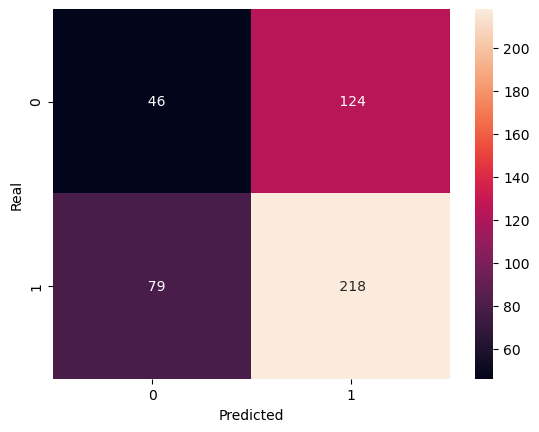

In [188]:
# Print confusion heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [189]:
# Print clasification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.27      0.31       170
           1       0.64      0.73      0.68       297

    accuracy                           0.57       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.54      0.57      0.55       467



In [190]:
#ROC curve
y_pred_proba = knn.predict_proba(X_test)
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

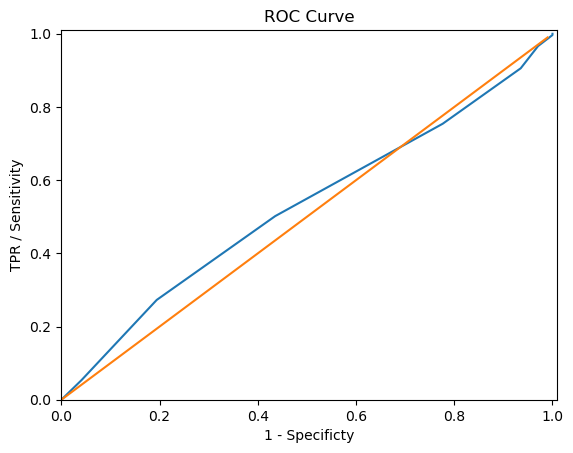

In [191]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [192]:
#AUC
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.527431174489998


Threshold optimal value is: 0.75


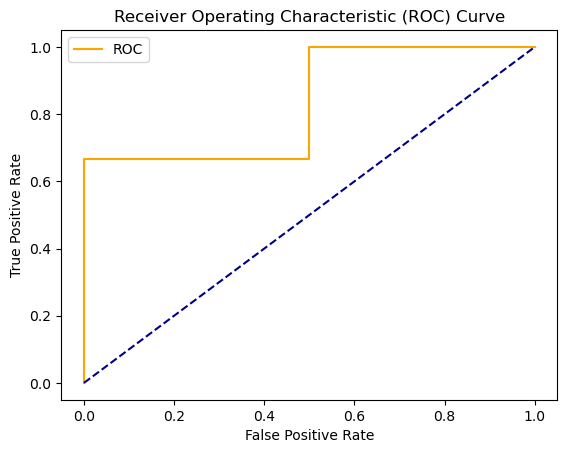

In [193]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_true = np.array([0,0, 1, 1,1])
y_scores = np.array([0.0,0.09, .05, .75,1])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold optimal value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [194]:
# Adjusting thereholds to 0.75
y_pred_075 = binarize(y_pred_proba, threshold=0.75)[:,1]
y_pred_075 = (y_pred_proba[:,1] > 0.75).astype(int)

In [195]:
print(' Original Matrix')
display(confusion_matrix(y_test,y_pred))
print('')
print('New Matrix')
display(confusion_matrix(y_test,y_pred_075))

 Original Matrix


array([[ 46, 124],
       [ 79, 218]], dtype=int64)


New Matrix


array([[ 96,  74],
       [148, 149]], dtype=int64)

## Coefficients coefficients

In [196]:
# Get the model coefficients
coefs = model.coef_[0]

# Calculate the odds ratio for each feature
odds_ratios = np.exp(coefs)

In [197]:
dict((zip(X_train.columns, np.exp(model.coef_[0]))))

{'Edad': 0.9922479275919774,
 'Genero_Mujer cis': 1.2228406439596513,
 'Genero_Mujer trans': 0.8544062653778203,
 'Genero_No binarie': 1.0647082473524396,
 'Genero_Varon cis': 1.0,
 'Genero_Varon trans': 1.0,
 'Nivel educativo_Primario incompleto': 1.6962356233734497,
 'Nivel educativo_Secundario completo': 0.9656044917883914,
 'Nivel educativo_Secundario incompleto': 0.8048745504642597,
 'Nivel educativo_Terciario completo': 0.9050736895269074,
 'Nivel educativo_Terciario incompleto': 0.8550337940459742,
 'Nivel educativo_Universitario completo': 1.5401332578316504,
 'Nivel educativo_Universitario incompleto': 0.7912447904877844,
 'Lugar de residencia actual_Provincia de Buenos Aires': 0.9664639869647863,
 'Tipo de vivienda_Conventillo/casa compartida': 1.0,
 'Tipo de vivienda_Departamento': 0.9057656986716335,
 'Tipo de vivienda_Otro': 1.0,
 'Tipo de vivienda_Pieza en hotel o pensión': 1.0,
 'Acceso a WiFi en el hogar_Si': 1.3557062081853262,
 'Acceso a internet con datos del celular

In [198]:
dict(zip(X_train.columns, model.coef_[0]))

{'Edad': -0.0077822759157743756,
 'Genero_Mujer cis': 0.20117654891824827,
 'Genero_Mujer trans': -0.15734847772980204,
 'Genero_No binarie': 0.06270081548334412,
 'Genero_Varon cis': 0.0,
 'Genero_Varon trans': 0.0,
 'Nivel educativo_Primario incompleto': 0.5284114565958435,
 'Nivel educativo_Secundario completo': -0.03500095739895623,
 'Nivel educativo_Secundario incompleto': -0.21706885164016262,
 'Nivel educativo_Terciario completo': -0.09973891370542717,
 'Nivel educativo_Terciario incompleto': -0.15661428562650712,
 'Nivel educativo_Universitario completo': 0.43186894374145496,
 'Nivel educativo_Universitario incompleto': -0.2341478894471194,
 'Lugar de residencia actual_Provincia de Buenos Aires': -0.03411124231634473,
 'Tipo de vivienda_Conventillo/casa compartida': 0.0,
 'Tipo de vivienda_Departamento': -0.09897461712239226,
 'Tipo de vivienda_Otro': 0.0,
 'Tipo de vivienda_Pieza en hotel o pensión': 0.0,
 'Acceso a WiFi en el hogar_Si': 0.3043225054136084,
 'Acceso a internet

## Coefficients using statsmodel

In [199]:
x_train = sm.add_constant(X_train_os)
logit_model=sm.Logit(y_train_os,X_train_os)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.671691
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     continue_with_telemedicine   No. Observations:                 1411
Model:                                  Logit   Df Residuals:                     1382
Method:                                   MLE   Df Model:                           28
Date:                        Wed, 27 Sep 2023   Pseudo R-squ.:                 0.02628
Time:                                03:07:24   Log-Likelihood:                -947.76
converged:                               True   LL-Null:                       -973.34
Covariance Type:                    nonrobust   LLR p-value:                  0.004778
                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

## Feature importance

<AxesSubplot:ylabel='Feature'>

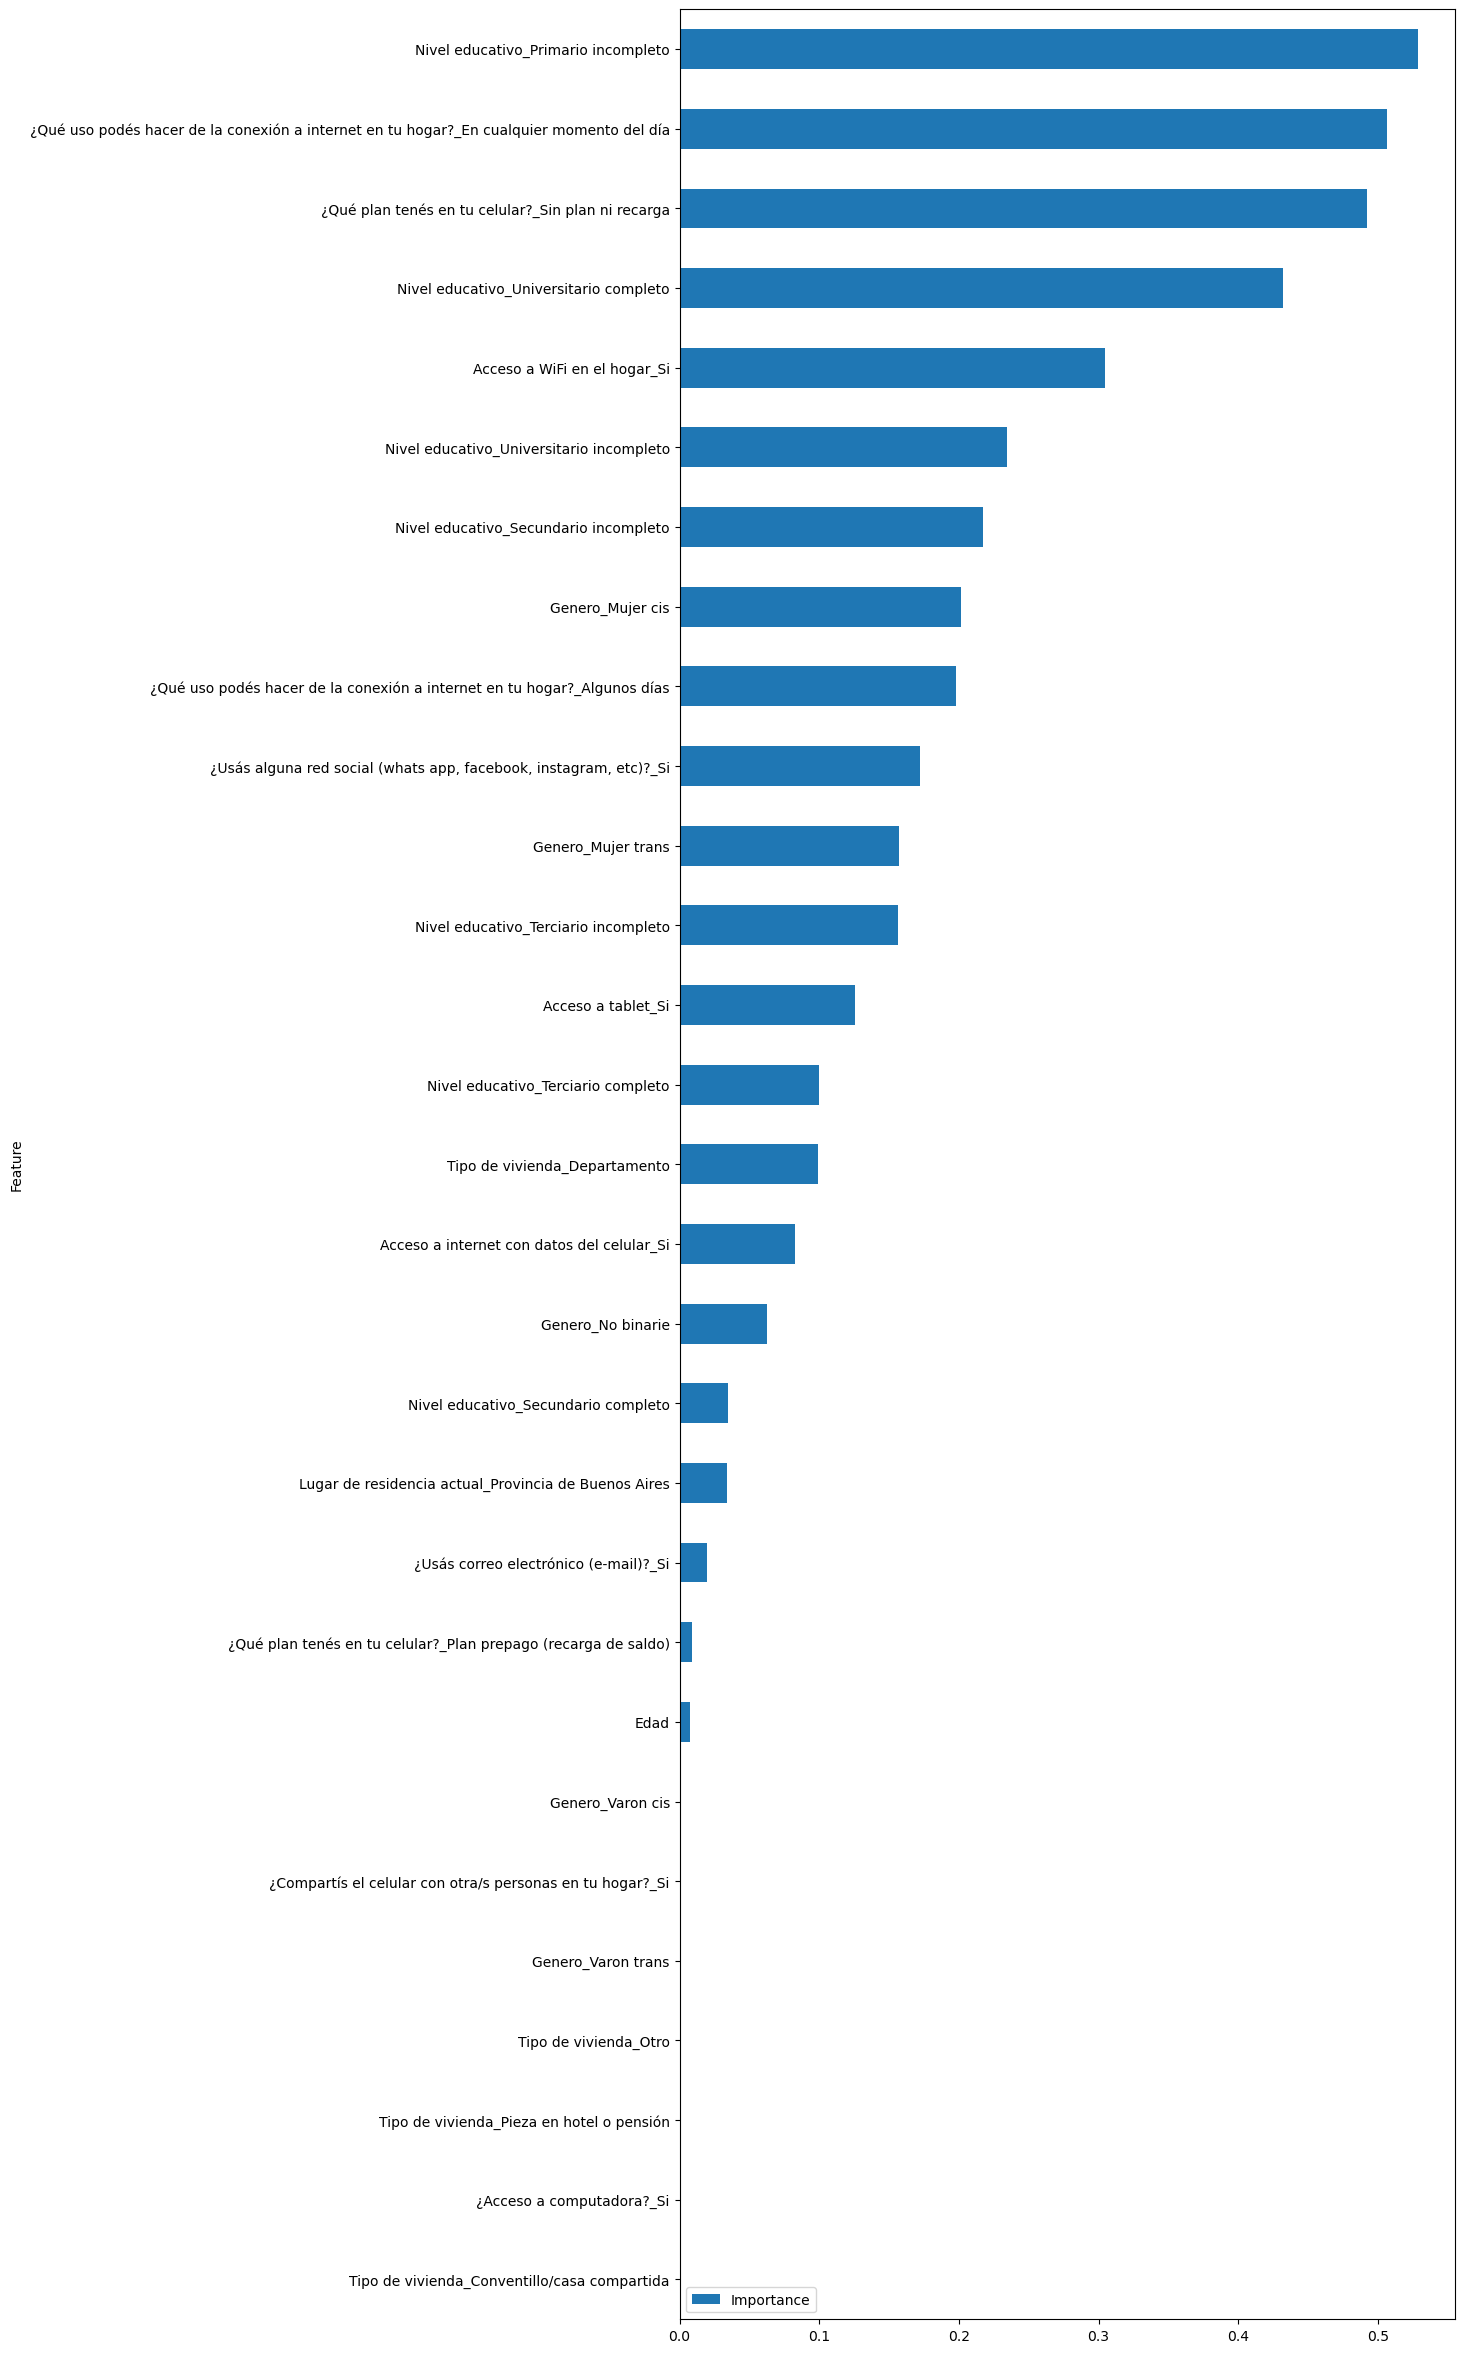

In [200]:
feature_importance = pd.DataFrame({'Feature': X_train_os.columns, 'Importance': np.abs(coefs)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 30))

## Feature selection

In [201]:
selector = SelectKBest(f_classif, k=10)
selector.fit(X, Y)
cols_idxs = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols_idxs]

In [202]:
features_df_new.columns

Index(['Genero_Mujer cis', 'Genero_Mujer trans',
       'Nivel educativo_Secundario completo',
       'Nivel educativo_Secundario incompleto',
       'Nivel educativo_Universitario completo',
       'Tipo de vivienda_Pieza en hotel o pensión',
       'Acceso a WiFi en el hogar_Si',
       '¿Qué uso podés hacer de la conexión a internet en tu hogar?_Algunos días',
       '¿Qué uso podés hacer de la conexión a internet en tu hogar?_En cualquier momento del día',
       '¿Acceso a computadora?_Si'],
      dtype='object')

# Conclusions

In [203]:
# We developed a Logistic Regression model using LASSO as a regularization strategy to determine the features that have more impact in choosing or not telemedicine for HIV care. Some of these are: Being a Trans or cisgender women; 2) Having completed, at least, high school education; 3) Live in a hotel or a shared room. In the middle, we carried out a threshold tunning to improve the model performances.